In [1]:
###########################################################################
####                           Import Modules                         #####
###########################################################################
import sys
function_dir = 'C:/Users/angus/Documents/git_repositories/ENGN4350_Honours/subsequence_dtw/'
sys.path.append(function_dir)

#---- Import Modules ----#
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import loadmat
import time
import cv2
from PIL import Image
import io
import folium
from tqdm import tqdm

import _functions.subsequence_dtw_functions as subsequence_dtw_functions
import _functions.visualisation as visualisation
import _functions.determine_ground_truth as determine_ground_truth

filename_dict ={'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mat',
                'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mat',
                'night'   : 'dvs_vpr_2020-04-27-18-13-29.mat',
                'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mat',
                'morning' : 'dvs_vpr_2020-04-28-09-14-11.mat',
                'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mat'}


#---- Colours ----#
green_sea = '#16a085'
emerald = '#2ecc71'
peter_river = '#3498db'
amythest = '#9b59b6'
carrot = '#e67e22'
pomegranate = '#c0392b'


#---- Plot Params ----#
suptitle_weight = 'bold'
suptitle_size = 16
title_weight = 'bold'
title_size = 14
label_weight = 'normal'
label_size = 12

plot_linewidth = 2
plot_boxwidth = 1.5



In [2]:
# master_mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
master_mat_dir = 'F:/Data/Output_Data/full_dataset/spatial_compression/resolution_[100-100]/pos_44_neg_-32/'
save_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Figures/_subsequenceDTW/figure_data/'

pos_threshold = 44
neg_threshold = -32
filter_gap = -1

query_name = 'sunset2'
reference_name = 'sunset1'

query_start_time = 100
query_end_time = 100.25
reference_start_time = 0
reference_end_time = 120

rows = 100
cols = 100

#---- Load data ----#
reference_dataset_full = loadmat(f'{master_mat_dir}{filename_dict[reference_name]}')['data']
query_dataset_full = loadmat(f'{master_mat_dir}{filename_dict[query_name]}')['data']

if query_dataset_full[0,0] != 0:
    query_dataset_full[:,0] -= query_dataset_full[0,0]

if reference_dataset_full[0,0] != 0:
    reference_dataset_full[:,0] -= reference_dataset_full[0,0]


#---- Preprocess data ----#
# Filter
# reference_dataset = subsequence_dtw_functions.filter_data(reference_dataset_full, filter_gap)
# query_dataset = subsequence_dtw_functions.filter_data(query_dataset_full, filter_gap)

query_dataset = query_dataset_full
reference_dataset = reference_dataset_full

# Slice out time
query = subsequence_dtw_functions.select_data_sequence(query_dataset, query_start_time, query_end_time)
reference = subsequence_dtw_functions.select_data_sequence(reference_dataset, reference_start_time, reference_end_time)

# Select which data we want (which elements of the event)
data_selection = 3
query_data, reference_data = subsequence_dtw_functions.select_data(query, reference, data_selection)
print(f'Input Data: \t Query {query_data.shape} \t Reference {reference_data.shape}')


#---- Perform DTW ----#
start_time = time.time()
C, D, P = subsequence_dtw_functions.subsequence_dtw(query_data, reference_data, print_en=0)
dtw_time = time.time() - start_time

a_ast = P[0, 1]
b_ast = P[-1, 1]

estimated_time = reference[b_ast, 0]
reference_path, query_position, estimated_postion, distance, ground_truth_index = determine_ground_truth.calc_ground_truth_interp(query_name, query_end_time, reference_name, estimated_time)

print(reference_dataset[ground_truth_index,:])

if filter_gap != -1:
    data_string = f'''Query: {query_name}
    Query Start: {query_start_time}
    Query End: {query_end_time}
    Query Length: {query_data.shape[0]}

    Reference: {reference_name}
    Reference Start: {reference_start_time}
    Reference End: {reference_end_time}
    Reference Length: {reference_data.shape[0]}

    Estimate Time: {estimated_time}

    Filter Gap: {filter_gap}
    Runtime (s): {dtw_time}
    Distance (m): {distance}
    '''
else:
    data_string = f'''Query: {query_name}
    Query Start: {query_start_time}
    Query End: {query_end_time}
    Query Length: {query_data.shape[0]}

    Reference: {reference_name}
    Reference Start: {reference_start_time}
    Reference End: {reference_end_time}
    Reference Length: {reference_data.shape[0]}

    Estimate Time: {estimated_time}

    Positive Threshold: {pos_threshold}
    Negative Threshold: {neg_threshold}
    Runtime (s): {dtw_time}
    Distance (m): {distance}
    '''

print(data_string)



with open(save_dir+'test_description.txt', 'w') as file:
    file.write(data_string)

np.save(save_dir+f'/D_mat.npy', D)
np.save(save_dir+f'/P_mat.npy', P)




FileNotFoundError: [Errno 2] No such file or directory: 'F:/Data/Output_Data/full_dataset/spatial_compression/resolution_[100-100]/pos_44_neg_-32/dvs_vpr_2020-04-21-17-03-03.mat'

In [ ]:
# print(query_end_time)
# print(estimated_time)
# print(reference_dataset[ground_truth_index,0])

# M_query = visualisation.get_video_frame(query_name, query_end_time)
# M_estimate = visualisation.get_video_frame(reference_name,estimated_time)
# M_groundtruth = visualisation.get_video_frame(reference_name, reference_dataset[ground_truth_index,0])

# fig, ax = plt.subplots(1,3)
# ax[0].imshow(M_query)
# ax[1].imshow(M_estimate)
# ax[2].imshow(M_groundtruth)
# plt.show()

#### Global Path Plots


(450.0, 950.0, 600.0, 150.0)

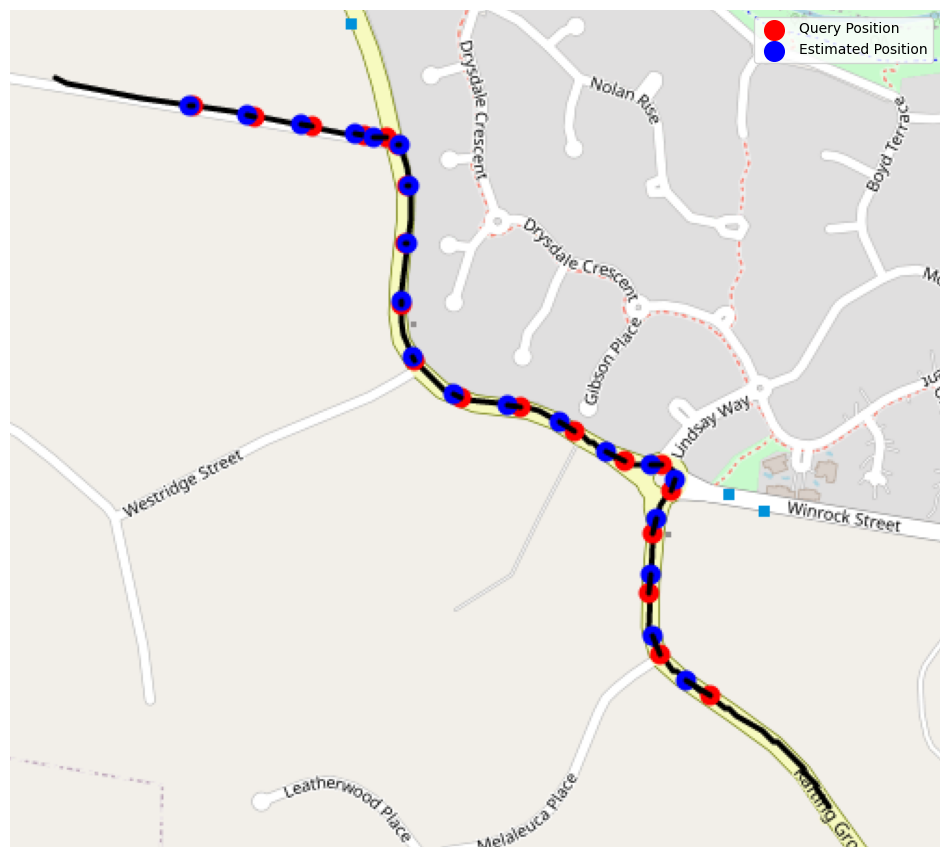

In [ ]:
data_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Output Data/subsequence_dtw/compression/resolution_[100-100]/dtw_output/data_3/'
filename = 'batch_data.csv'

gps_interp_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/pos_44_neg_-32/'
gps_file_dict = {'sunset1' : 'sunset1_gps.csv',
                    'sunset2' : 'sunset2_gps.csv'}

query_name = 'sunset2'
reference_name = 'sunset1'

#---- Load Data ----#
# load DTW batch values 
df = pd.read_csv(data_dir + filename)

query_positions = [df['query_position_0'],df['query_position_1']]
query_positions = np.asarray(query_positions).T
estimated_positions = [df['estimated_position_0'],df['estimated_position_1']]
estimated_positions = np.asarray(estimated_positions).T


# plt.figure()
# plt.scatter(estimated_positions[:,1], estimated_positions[:,0])
# plt.scatter(query_positions[:,1], query_positions[:,0])
# plt.show()

# load the reference map
reference_start_time = 0
reference_end_time = 120
reference_map = np.genfromtxt(gps_interp_dir + gps_file_dict[reference_name], delimiter=',')
reference_path = reference_map[:,1:3]

#---- Plot on Map ----#
#---- Define map parameters ----#
map_lat = reference_path[:,0]
map_lon = reference_path[:,1]

min_lat = min(map_lat)
max_lat = max(map_lat)
median_lat = np.median(map_lat)
min_lon = min(map_lon)
max_lon = max(map_lon)
median_lon = np.median(map_lon)

# points = np.array([[query_positions[0], query_positions[1]],
#                    [estimated_positions[0], estimated_positions[1]]])


#---- Mapping ----#
# Create map
zoom = 16
m = folium.Map(min_zoom=zoom, max_bounds=True, location=[median_lat, median_lat], zoom_start=zoom, min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)

# Create markers

# Create path
reference_map = folium.PolyLine(locations=reference_path, color='black', weight=3)

# Add features to map
reference_map.add_to(m)

for i in range(query_positions.shape[0]):
    query_marker = folium.CircleMarker(location=[query_positions[i,0], query_positions[i,1]], radius=4, color='red', fill=True, fill_color='red',fill_opacity=1)
    query_marker_label = folium.Popup('Query', parse_html=True)
    # linking_map.add_to(m)
    query_marker.add_to(m)
    query_marker.add_child(query_marker_label)

    estimate_marker = folium.CircleMarker(location=[estimated_positions[i,0], estimated_positions[i,1]], radius=4, color='blue', fill=True, fill_color='blue',fill_opacity=1)
    estimate_marker_label = folium.Popup('Query', parse_html=True)
    # linking_map.add_to(m)
    estimate_marker.add_to(m)
    estimate_marker.add_child(estimate_marker_label)

    points = np.array([[query_positions[i,0], query_positions[i,1]],
                       [estimated_positions[i,0], estimated_positions[i,1]]])
    linking_map = folium.PolyLine(locations=points, color='black', weight=3)#, dash_array=[5,5])
    linking_map.add_to(m)
m

# Convert the map to an image
img_data = m._to_png(1)
img = Image.open(io.BytesIO(img_data))

fig, ax = plt.subplots(figsize=(12,12))
# fig.suptitle()
ax.imshow(img)
ax.scatter(0, 0, s=200, label='Query Position', alpha=1, color='red')
ax.scatter(0, 0, s=200, label='Estimated Position', alpha=1, color='blue')

ax.set_xlim((450, 950))
ax.set_ylim((150, 600))
ax.legend()
ax.invert_yaxis()
ax.axis('off')


In [1]:
# data_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Output Data/subsequence_dtw/compression/resolution_[100-100]/dtw_output/data_3/'
# filename = 'batch_data.csv'

# gps_interp_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/pos_44_neg_-32/'
# gps_file_dict = {'sunset1' : 'sunset1_gps.csv',
#                  'sunset2' : 'sunset2_gps.csv'}

# query_name = 'sunset2'
# reference_name = 'sunset1'

# #---- Load Data ----#
# # load DTW batch values 
# df = pd.read_csv(data_dir + filename)
# query_end_time = df['query_end']
# estimated_end_time = df['estimated_end']

# estimated_position_list = []

# for query_time, estimated_time in tqdm(zip(query_end_time, estimated_end_time), 'Processing files:'):
#     print(estimated_time)
#     reference_path, query_position, estimated_position, distance, groundtruth_index = determine_ground_truth.calc_ground_truth_interp(query_name, query_time, reference_name, estimated_time) 
#     estimated_position_list.append([estimated_position[0], estimated_position[1]])

# estimated_position = np.asarray(estimated_position_list)

# # print(estimated_postion)

In [ ]:
# correct_estimated_positions = estimated_position

In [ ]:
# data_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Output Data/subsequence_dtw/compression/resolution_[100-100]/dtw_output/data_3/'
# filename = 'batch_data.csv'

# gps_interp_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/_compression_interpolation/pos_44_neg_-32/'
# gps_file_dict = {'sunset1' : 'sunset1_gps.csv',
#                     'sunset2' : 'sunset2_gps.csv'}

# query_name = 'sunset2'
# reference_name = 'sunset1'

# #---- Load Data ----#
# # load DTW batch values 
# df = pd.read_csv(data_dir + filename)
# df['estimated_position_1'] = correct_estimated_positions[:,1]

In [ ]:
# df_filename = 'corrected_batch_data.csv'
# df.to_csv(df_filename, index=False, header=True ,mode='w') # append if file exists
